In [29]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white
#1st file - Greene 7.8

greene_df = pd.read_csv("greene7_8.csv")
print(greene_df)

independent_variables = greene_df.loc[:, greene_df.columns != 'G']
independent_variables = independent_variables.loc[:, independent_variables.columns != 'obs']
#print(independent_variables)

     obs      G     Pg      Y    Pnc    Puc    Ppt     Pd     Pn     Ps    Pop
0   1960  129.7  0.925   6036  1.045  0.836  0.810  0.444  0.331  0.302  180.7
1   1961  131.3  0.914   6113  1.045  0.869  0.846  0.448  0.335  0.307  183.7
2   1962  137.1  0.919   6271  1.041  0.948  0.874  0.457  0.338  0.314  186.5
3   1963  141.6  0.918   6378  1.035  0.960  0.885  0.463  0.343  0.320  189.2
4   1964  148.8  0.914   6727  1.032  1.001  0.901  0.470  0.347  0.325  191.9
5   1965  155.9  0.949   7027  1.009  0.994  0.919  0.471  0.353  0.332  194.3
6   1966  164.9  0.970   7280  0.991  0.970  0.952  0.475  0.366  0.342  196.6
7   1967  171.0  1.000   7513  1.000  1.000  1.000  0.483  0.375  0.353  198.7
8   1968  183.4  1.014   7728  1.028  1.028  1.046  0.501  0.390  0.368  200.7
9   1969  195.8  1.047   7891  1.044  1.031  1.127  0.514  0.409  0.386  202.7
10  1970  207.4  1.056   8134  1.076  1.043  1.285  0.527  0.427  0.407  205.1
11  1971  218.3  1.063   8322  1.120  1.102  1.377  

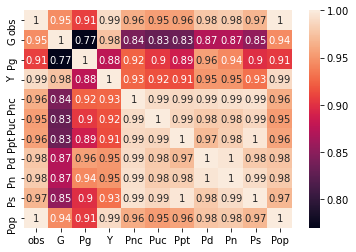

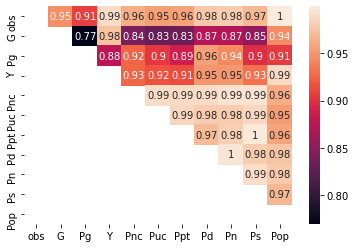

In [30]:
#correlation_matrix

#create correlation matrix
greene_corr_matrix = greene_df.corr().abs()
sb.heatmap(greene_corr_matrix, annot=True)
plt.show()

#select upper triangle of correlation matrix
greene_corr_matrix_upper = greene_corr_matrix.where(np.triu(np.ones(greene_corr_matrix.shape), k=1).astype(bool))
sb.heatmap(greene_corr_matrix_upper, annot=True)
plt.show()

In [31]:
#If the value of VIF is –

    #1 => not correlated. Multicollinearity doesn’t exist.
    #Between 1 and 5 => moderately correlated. Low multicollinearity exists.
    #Greater than 5 => Highly correlated. High Multicollinearity exists.
    
vif_data = pd.DataFrame()
vif_data["feature"] = greene_df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(greene_df.values, i)
                          for i in range(len(greene_df.columns))]
  
print(vif_data)

   feature           VIF
0      obs  17306.995690
1        G   3088.669402
2       Pg    736.377082
3        Y   8730.053128
4      Pnc   4502.291494
5      Puc    515.844095
6      Ppt   1452.429204
7       Pd   7008.149732
8       Pn  12946.032227
9       Ps  12262.833807
10     Pop  37604.696080


In [32]:
#Model 1
independent_variables = sm.add_constant(independent_variables)
ols_model = sm.OLS(greene_df["G"], independent_variables).fit()

summary = ols_model.summary()
print(summary)

#R-squared - statistical measure of how well the regression line approximates the real data points.

#Adj. R-squared - actually adjusts the statistics based on the number of independent variables present.

#F-statistic - the ratio of mean squared error of the model to the mean squared error of residuals.

#AIC - estimates the relative quality of statistical models for a given dataset.

#BIC - used as a criterion for model selection among a finite set of models.

#coef - the coefficients of the independent variables and the constant term in the equation.

#std err - the basic standard error of the estimate of the coefficient.

#t - a measure of how statistically significant the coefficient is.

#P > |t| - the null-hypothesis that the coefficient = 0 is true.

                            OLS Regression Results                            
Dep. Variable:                      G   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     412.1
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           1.04e-25
Time:                        12:40:14   Log-Likelihood:                -102.42
No. Observations:                  36   AIC:                             224.8
Df Residuals:                      26   BIC:                             240.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -254.8353     90.093     -2.829      0.0

In [33]:
#Model 2
#Removing variables with p value higher than 0,05 (significance level)

independent_variables = independent_variables[["Pg", "Y", "Pop"]]
independent_variables = sm.add_constant(independent_variables)
ols_model = sm.OLS(greene_df["G"], independent_variables).fit()

summary = ols_model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      G   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     772.7
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           6.40e-30
Time:                        12:40:14   Log-Likelihood:                -114.49
No. Observations:                  36   AIC:                             237.0
Df Residuals:                      32   BIC:                             243.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.5796     39.377      0.497      0.6

In [34]:
#Model 3

independent_variables = independent_variables[["Pg", "Y"]]
independent_variables = sm.add_constant(independent_variables)
ols_model = sm.OLS(greene_df["G"], independent_variables).fit()

summary = ols_model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      G   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     987.1
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           3.65e-30
Time:                        12:40:14   Log-Likelihood:                -117.89
No. Observations:                  36   AIC:                             241.8
Df Residuals:                      33   BIC:                             246.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -79.7535      8.673     -9.196      0.0

In [35]:
#Test autocorrelation of residuals
#We have Durbin-Watson statistic
#how to get the p-value?
#https://www.real-statistics.com/statistics-tables/durbin-watson-table/

#A test statistic of 2 indicates no serial correlation.
#The closer the test statistics is to 0, the more evidence of positive serial correlation.
#The closer the test statistics is to 4, the more evidence of negative serial correlation.


In [36]:
#Test normality of residual
#Didn't understand how to do it


In [37]:
#2nd file - data 4-9

data_df = pd.read_csv("data4-9.csv")
print(data_df)

independent_variables_2 = data_df.loc[:, data_df.columns != 'retrd']
#independent_variables = independent_variables.loc[:, independent_variables.columns != 'obs']
#print(independent_variables)

    retrd  hlth  mssec  mpubas  unemp   dep  race
0    14.9   6.2   3678    1875    7.7  32.6  26.6
1    15.6   1.6   3465    2541    9.5  38.9  21.6
2    13.8   4.5   4399    2313    5.8  29.9  17.1
3    16.7   7.6   3684    1854    6.8  31.7  16.7
4    11.3   4.3   4187    3003    6.6  27.6  23.2
5     5.7   2.8   3943    2322    4.9  30.9  10.8
6     9.6   3.0   4392    3045    4.9  29.9   9.5
7    12.3   3.8   4210    2402    6.6  30.8  17.5
8    13.0   5.1   3715    2988    6.5  12.6  72.8
9    15.0   5.2   4395    2390    4.9  23.9  15.9
10   11.3   2.6   3964    3079    4.5  35.2  64.0
11    9.7   3.5   4082    2194    7.9  36.2   4.4
12    7.9   3.7   4225    2058    7.5  33.3   8.5
13    7.0   3.2   4059    2504    5.2  32.7   2.7
14    7.1   3.3   4109    2316    4.0  31.2   8.4
15   18.2   7.1   3809    2212    8.9  34.5   7.6
16   15.8   5.4   3618    2176    5.8  33.3  29.8
17   13.8   5.1   3905    2083    7.8  33.0   1.0
18   13.4   3.9   4052    2462    5.8  30.6  24.3


In [38]:
#Model 1
independent_variables_2 = sm.add_constant(independent_variables_2)
data_ols_model = sm.OLS(data_df["retrd"], independent_variables_2).fit()

summary = data_ols_model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  retrd   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     14.54
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           1.91e-08
Time:                        12:40:14   Log-Likelihood:                -92.817
No. Observations:                  44   AIC:                             199.6
Df Residuals:                      37   BIC:                             212.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9297      9.202     -0.427      0.6

In [39]:
#Model 2
#Removing variables with p value higher than 0,05 (significance level)

independent_variables_2 = independent_variables_2[["hlth","unemp","race"]]
independent_variables_2 = sm.add_constant(independent_variables_2)
data_ols_model = sm.OLS(data_df["retrd"], independent_variables_2).fit()

summary = data_ols_model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  retrd   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     27.76
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           7.16e-10
Time:                        12:40:14   Log-Likelihood:                -94.706
No. Observations:                  44   AIC:                             197.4
Df Residuals:                      40   BIC:                             204.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0209      1.568      0.013      0.9

In [41]:
#White's test - heteroskedasticity
#It tests whether the variance of the errors from a regression 
#is dependent on the values of the independent variables. 
#It is a χ2 test. You can perform the test using the fitted values 
#of the model, the predictors in the model and a subset of the 
#independent variables.

#print(data_ols_model.resid)

white_test = het_white(data_ols_model.resid,  data_ols_model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

#P value for White's test is 8,3% (higher than 5%), we accept H0: 
#Homoscedasticity is present (residuals are equally scattered)

{'Test Statistic': 15.292794806346876, 'Test Statistic p-value': 0.0832010365141825, 'F-Statistic': 2.012483625271387, 'F-Test p-value': 0.06847789821858417}


In [42]:
#If the value of VIF is –

    #1 => not correlated. Multicollinearity doesn’t exist.
    #Between 1 and 5 => moderately correlated. Low multicollinearity exists.
    #Greater than 5 => Highly correlated. High Multicollinearity exists.
    
vif_data_2 = pd.DataFrame()
vif_data_2["feature"] = independent_variables_2.columns
  
# calculating VIF for each feature
vif_data_2["VIF"] = [variance_inflation_factor(independent_variables_2.values, i)
                          for i in range(len(independent_variables_2.columns))]
  
print(vif_data_2)

#Low multicollinearity - this means that there are no statistically significant dependencies between
#the explanatory variables

  feature        VIF
0   const  22.676571
1    hlth   1.229765
2   unemp   1.175977
3    race   1.069602
